# Dataset visualisation and  cleaning

<div class="alert alert-block alert-success">
<b> Data cleaning </b> can be a tedious task. 
According to IBM Data Analytics you can expect to spend up to 80% of your time cleaning data. ok.
</div>

## Dataset description and visualisation

<div class="alert alert-block alert-success">
Data visualization is an essential aspect of data analysis that focuses on visually representing data. It provides a visual summary that aids in
processing and understanding information through images, maps, and graphs, simplifying observation, analysis, and comprehension. This is
particularly beneficial for large datasets, where manual processing can be tedious. Moreover, it helps highlight trends, patterns, and outliers.
Python offers a variety of libraries for data visualization, including Plotly, Matplotlib, and Seaborn.
</div>

<div class="alert alert-block alert-warning">Hepatitis is an inflammation of the liver. Most hepatitis patients are often asymptomatic. The Hepatitis dataset contains records of hepatitis cases in individuals and predicts patient survivability. For more details on this dataset, visit: https://archive.ics.
uci.edu/dataset/46/hepatitis <div>

<div class="alert alert-block alert-danger">
    
1. Import the Hepatitis dataset 
2. Print the first 10 samples
3. Print 3 random samples
4. Print the last 5 samples
5. Display the following information about the dataset: columns, number of missing values in each column, and the type of features, all in one instruction.
5. Display only the columns and their types (whether they are numerical or categorical).
6. Display the number of samples and features.
7. Display statistics for all numerical features: count, mean, standard deviation, quantiles, minimum, and maximum values.
8. Verify if the dataset is balanced using a count and a plot.
9. Using the pandas library, perform a line plot, histogram, and box plot for continuous values only. In the line plot, why is the line graph of the
feature ”protime” not continuous?
<\div>

<b>A standard deviation (or σ) </b> is a measure of how dispersed the data is in relation to the mean.

<b> The median </b> is the middle value in a list ordered from smallest to largest.

<b> 25%, 50%, and 75% </b> present the Q1, Median, and Q3 values. 
![title](fig1.png)

## Dataset cleaning

<div class="alert alert-block alert-success">
Data cleaning is a crucial step in the machine learning process for optimal algorithm performance. It involves identifying and correcting issues such as missing values, duplicates, and irrelevant data to ensure accurate, consistent, high-quality, and error-free datasets. Common techniques used in data cleaning include handling missing values, removing duplicates, data type conversion, and outlier detection.
</div>

### Missing values

<div class="alert alert-block alert-success">
Handling missing data is a critical aspect of data preprocessing in machine learning. Effective strategies include imputing missing values
using statistical methods, removing records with missing values, or employing advanced imputation techniques. Each approach has its advantages and limitations, and choosing the right method is essential
for preventing biases and maintaining the integrity of analyses.
</div>

<div class="alert alert-block alert-danger"> 
    
1. Why is data missing? 
2. Print all samples that contain missing values.
3. Print features that contain missing values.
5. Print samples with features that contain missing values.
6. Identify the number of missing values in each feature.
7. Create a new dataframe from the first one and drop samples containing
missing values.
8. Create a new dataframe from the first one and delete columns contain-
ing missing values. Is deleting missing values a solution?
9. Replace missing values using the mean (for continuous values) or mode
(for categorical values) and print the number of missing values after
imputation.
<div/>

### Outliers

<div class="alert alert-block alert-success">
Outliers are data points that significantly deviate from the norm and can arise from various causes, including errors, anomalies, or data variability. Their presence can negatively impact the performance of machine learning models, making it essential to manage outliers for obtaining accurate results. To address outliers, it is important to identify and manage them effectively by either deciding whether to remove them or transforming them to minimize their impact on analysis.
<div/>

<div class="alert alert-block alert-danger">

1. Find  outliers in the data using box plots 
2. Compute the Interquartile Range (IQR), upper and lower bounds for
both the alkaline phosphate and bilirubin features, and detect outliers.
3. Handle outliers using an automatic method (not mean or median).
<div/>

float64
float64
Missing values in alk_phosphate: 29
Missing values in bilirubin: 6
       alk_phosphate   bilirubin
count     126.000000  126.000000
mean      105.325397    1.336508
std        51.508109    0.946877
min        26.000000    0.300000
25%        74.250000    0.700000
50%        85.000000    1.000000
75%       132.250000    1.500000
max       295.000000    4.800000


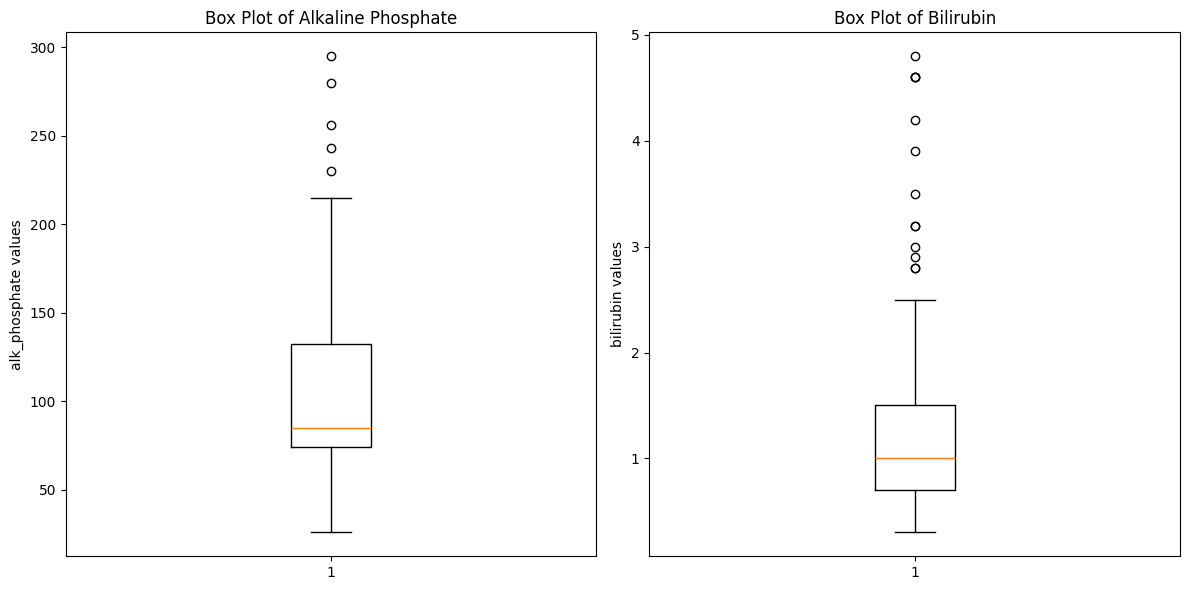

In [2]:
import pandas as pd

# Load the hepatitis dataset from the uploaded CSV file
data = pd.read_csv('hepatitis.csv')
import matplotlib.pyplot as plt
# Check for missing or non-numeric data in the columns
print(data['alk_phosphate'].dtype)
print(data['bilirubin'].dtype)

# Check for missing values
print(f"Missing values in alk_phosphate: {data['alk_phosphate'].isnull().sum()}")
print(f"Missing values in bilirubin: {data['bilirubin'].isnull().sum()}")

# Drop rows with missing values in the selected columns before plotting (if necessary)
data_cleaned = data.dropna(subset=['alk_phosphate', 'bilirubin'])

# Verify cleaned data
print(data_cleaned[['alk_phosphate', 'bilirubin']].describe())

# Create box plots again
plt.figure(figsize=(12, 6))

# Box plot for 'alk_phosphate'
plt.subplot(1, 2, 1)
plt.boxplot(data_cleaned['alk_phosphate'])
plt.title('Box Plot of Alkaline Phosphate')
plt.ylabel('alk_phosphate values')

# Box plot for 'bilirubin'
plt.subplot(1, 2, 2)
plt.boxplot(data_cleaned['bilirubin'])
plt.title('Box Plot of Bilirubin')
plt.ylabel('bilirubin values')

plt.tight_layout()
plt.show()


In [30]:
# Function to compute IQR, upper and lower bounds, and detect outliers
def detect_outliers(feature):
    Q1 = data[feature].quantile(0.25)  # First quartile
    Q3 = data[feature].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile Range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data_lower = data[data[feature] < lower_bound]
    data_upper = data[data[feature] > upper_bound]
    
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
  
    print(f"For feature {feature}:")
    print(f"IQR: {IQR}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f"Number of outliers: {len(outliers)}")
    print("Outliers: \n", outliers)
    print(f"\nData below lower bound: \n{data_lower}")
    print(f"\nData above upper bound: \n{data_upper}")

# Detect outliers for 'alk_phosphate'
# detect_outliers('alk_phosphate')

# detect_outliers('malaise')
# # Detect outliers for 'bilirubin'
# detect_outliers('bilirubin')
data_alk=data['alk_phosphate']>220
data_upper2 = data[data['alk_phosphate'] >219.25 ]
print(f'this is last {data_upper2}')
print(f'this alk {data_alk}')


this is last Empty DataFrame
Columns: [age, sex, steroid, antivirals, fatigue, malaise, anorexia, liver_big, liver_firm, spleen_palpable, spiders, ascites, varices, bilirubin, alk_phosphate, sgot, albumin, protime, histology, class]
Index: []
this alk 0      False
1      False
2      False
3      False
4      False
       ...  
150    False
151    False
152    False
153    False
154    False
Name: alk_phosphate, Length: 155, dtype: bool


In [7]:
# Function to clip outliers based on IQR
def clip_outliers(feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Clip the outliers to the lower and upper bounds
    data[feature] = data[feature].clip(lower=lower_bound, upper=upper_bound)

# Apply clipping to alk_phosphate and bilirubin
alkal_before=data['alk_phosphate'].describe()
biliru_before=data['bilirubin'].describe()
clip_outliers('alk_phosphate')
clip_outliers('bilirubin')

# Verify the changes
print('Alkaline Phosphate before clipping:\n')
print(alkal_before)
print("Alkaline Phosphate after clipping:")
print(data['alk_phosphate'].describe())

print('Bilirubin before clipping:\n')
print(biliru_before)
print("Bilirubin after clipping:")
print(data['bilirubin'].describe())


Alkaline Phosphate before clipping:

count    126.000000
mean     103.676587
std       46.690353
min       26.000000
25%       74.250000
50%       85.000000
75%      132.250000
max      219.250000
Name: alk_phosphate, dtype: float64
Alkaline Phosphate after clipping:
count    126.000000
mean     103.676587
std       46.690353
min       26.000000
25%       74.250000
50%       85.000000
75%      132.250000
max      219.250000
Name: alk_phosphate, dtype: float64
Bilirubin before clipping:

count    149.000000
mean       1.249664
std        0.674900
min        0.300000
25%        0.700000
50%        1.000000
75%        1.500000
max        2.700000
Name: bilirubin, dtype: float64
Bilirubin after clipping:
count    149.000000
mean       1.249664
std        0.674900
min        0.300000
25%        0.700000
50%        1.000000
75%        1.500000
max        2.700000
Name: bilirubin, dtype: float64


## Study of correlation and feature selection

<div class="alert alert-block alert-success">
Feature selection is a crucial process in machine learning that involves
automatically identifying the most relevant features in a dataset that
contribute to the decision-making process. Including irrelevant and
highly correlated features can lead to decreased accuracy. This process
also helps to manage high-dimensional data by reducing overfitting,
enhancing model accuracy, and decreasing training time.
<div/>

<div class="alert alert-block alert-danger"> 

1. Drop the feature ”Sex”.
2. Plot the Pearson correlation heatmap to observe the correlation of in-
dependent variables with the output variable.
3. Only select features that have an absolute correlation above 0.5 with
the output variable.
4. Drop the features that are highly correlated with malaise.
5. Should features be correlated?
<div/>

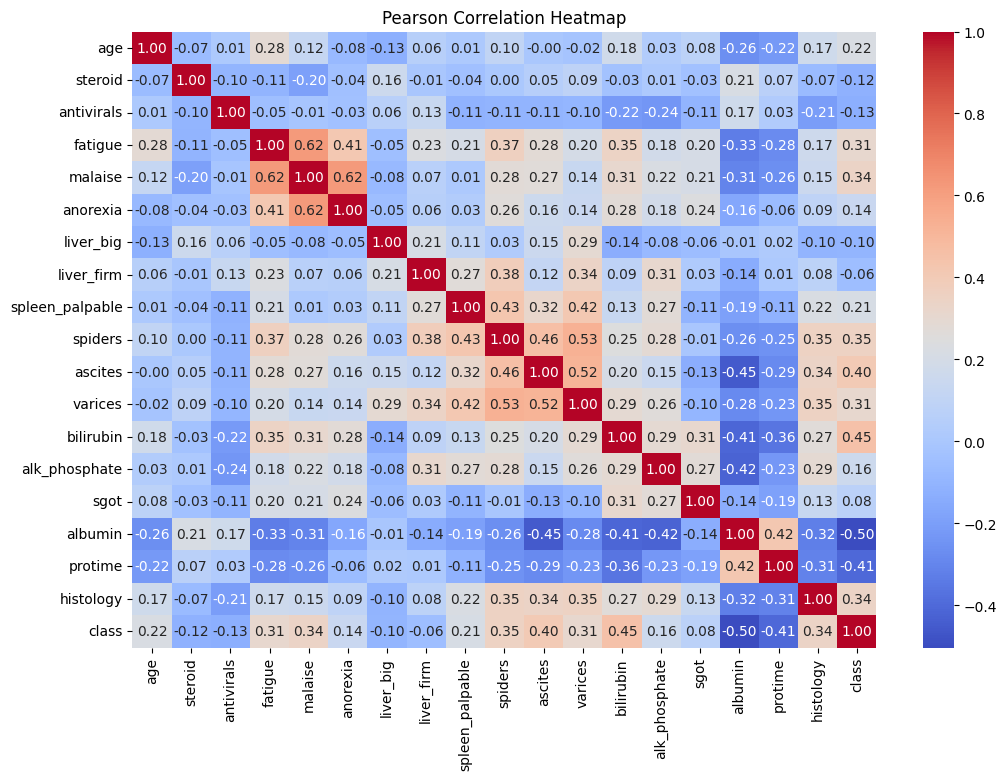

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Drop the feature 'Sex'
data_cleaned = data.drop(columns=['sex'])

# Step 2: Compute the Pearson correlation matrix for numerical features
# Convert non-numeric data to numeric, where necessary, for correlation calculation
data_numeric = data_cleaned.copy()
for column in data_numeric.select_dtypes(include=['object']).columns:
    data_numeric[column] = pd.factorize(data_numeric[column])[0]  # Factorize object columns

# Calculate the correlation matrix
corr_matrix = data_numeric.corr()

# Plot the Pearson correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()


In [10]:
# Step 3: Select features with absolute correlation above 0.5 with the output variable 'class'
# First, check the correlation of all features with 'class'
output_correlation = corr_matrix['class'].abs()

# Select features where absolute correlation with 'class' is greater than 0.5
selected_features = output_correlation[output_correlation > 0.5].index.tolist()

# Step 4: Drop features highly correlated with 'malaise'
# Find features highly correlated with 'malaise'
malaise_correlation = corr_matrix['malaise'].abs()

# Drop features with high correlation (above 0.5) with 'malaise'
drop_features = malaise_correlation[malaise_correlation > 0.5].index.tolist()

# Dropping those from selected features
final_features = [feature for feature in selected_features if feature not in drop_features]

# Output the final selected features
final_features


['albumin', 'class']

## Data splitting

<div class="alert alert-block alert-success">
Data splitting is the process of dividing a dataset into two or more subsets, typically comprising a training set and a testing set. This ensures that models are trained on one subset of the data (training set) while being evaluated on another (test set), which helps effectively assess their performance and improve generalization. In Python, the scikit-learn library is a popular choice for implementing data splitting, offering various functions and classes to facilitate this essential process.
<div/>

<div class="alert alert-block alert-danger">

1. Split the data into training and test sets using the hold-out and strat-
ified hold-out strategies.
2. Display the number of samples in each class for both strategies in the
training and test sets.
<div/>


1. Hold-out Strategy
In the hold-out strategy, the dataset is split into two subsets: a training set and a test set. The split is done randomly, and typically a certain percentage (e.g., 80% for training and 20% for testing) is used.

2. Stratified Hold-out Strategy
In the stratified hold-out strategy, the split ensures that the distribution of classes (in the target variable) is preserved in both the training and test sets. This is especially useful for imbalanced datasets where some classes might be underrepresented.

Both strategies can be implemented using the train_test_split function from scikit-learn. To ensure stratification, we set the stratify parameter.


In [15]:
from sklearn.model_selection import train_test_split

# Step 1: Prepare data and target
X = data_numeric.drop(columns=['class'])  # Features
y = data_numeric['class']  # Target

# Split the data using the Hold-out strategy (80% train, 20% test)
X_train_holdout, X_test_holdout, y_train_holdout, y_test_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data using the Stratified Hold-out strategy (preserving class distribution)
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Display the number of samples in each class for both strategies
# For Hold-out
holdout_train_class_dist = y_train_holdout.value_counts()
holdout_test_class_dist = y_test_holdout.value_counts()

# For Stratified Hold-out
stratified_train_class_dist = y_train_stratified.value_counts()
stratified_test_class_dist = y_test_stratified.value_counts()

holdout_train_class_dist, holdout_test_class_dist, stratified_train_class_dist, stratified_test_class_dist


(class
 0    99
 1    25
 Name: count, dtype: int64,
 class
 0    24
 1     7
 Name: count, dtype: int64,
 class
 0    98
 1    26
 Name: count, dtype: int64,
 class
 0    25
 1     6
 Name: count, dtype: int64)